In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def display_img(img, cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

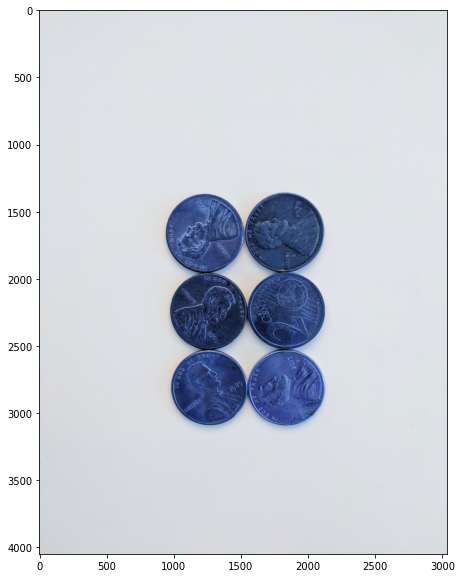

In [58]:
img = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\pennies.jpg')
display_img(img)

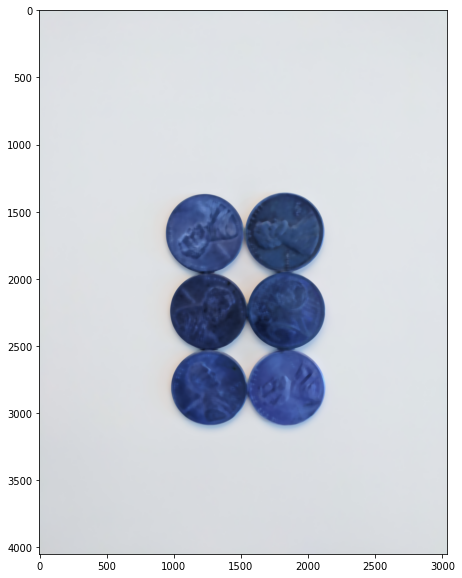

In [41]:
blurred = cv2.medianBlur(img, ksize=25)
display_img(blurred)

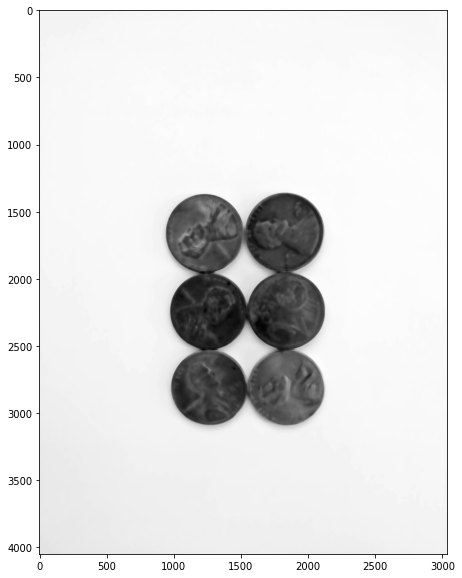

In [42]:
gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
display_img(gray_blurred, 'gray')

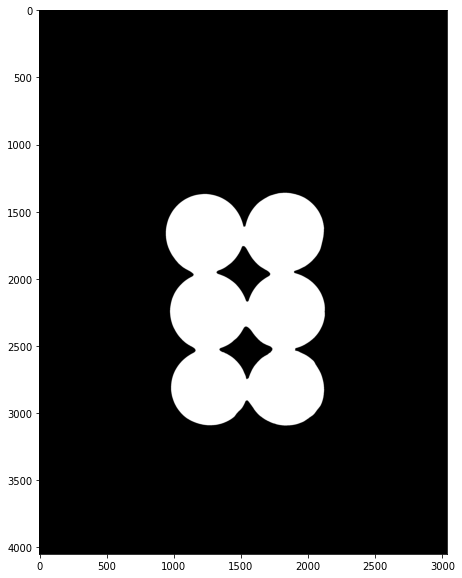

In [48]:
ret, thres = cv2.threshold(gray_blurred, 160, 255, cv2.THRESH_BINARY_INV)
display_img(thres, 'gray')

In [49]:
contours, hierarchy = cv2.findContours(thres.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [51]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

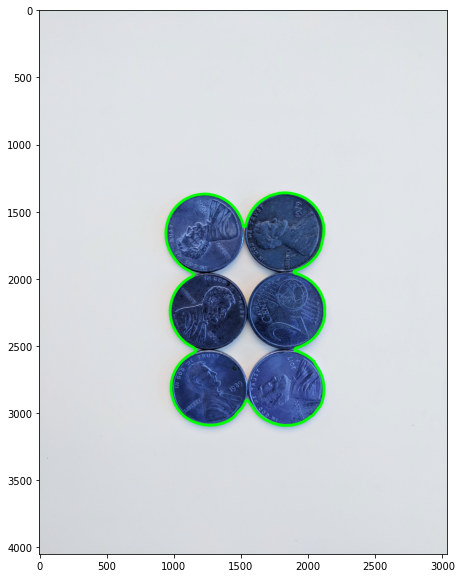

In [59]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (0,255,0), 20)

display_img(img)

## Wartershed Algorithm


In [60]:
img = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\pennies.jpg')

### Blur

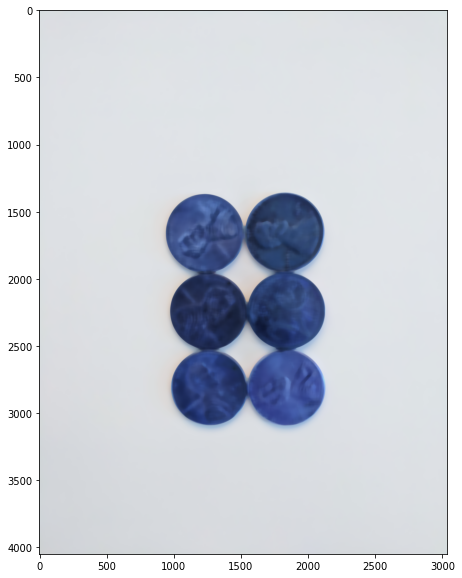

In [62]:
blurred = cv2.medianBlur(img, ksize=35)
display_img(blurred)

### Grayscale

In [63]:
gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

### Otsu's threshold method

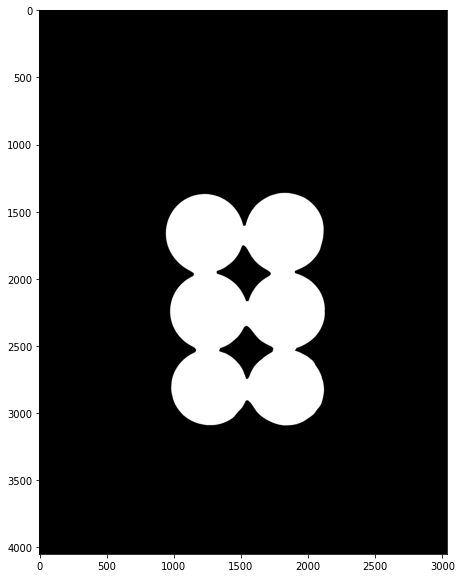

In [65]:
ret, thres = cv2.threshold(gray_blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display_img(thres, 'gray')

In [66]:
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

### Noise removal

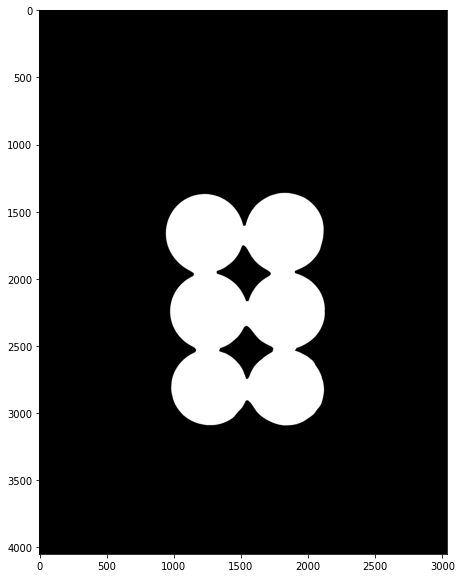

In [68]:
openning = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel, iterations=2)
display_img(openning, 'gray')

### Background

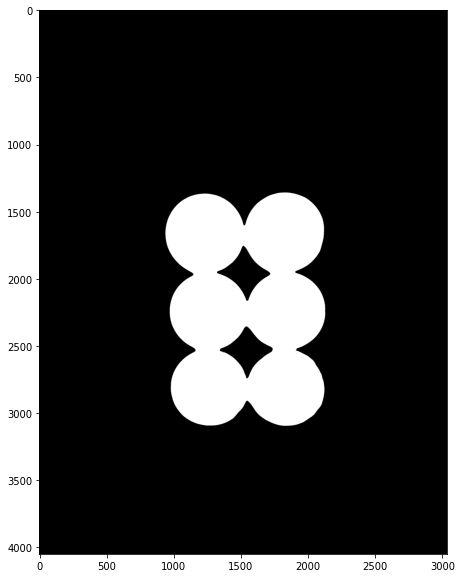

In [73]:
sure_bg = cv2.dilate(openning, kernel, iterations=3)
display_img(sure_bg, 'gray')

### Distance transform

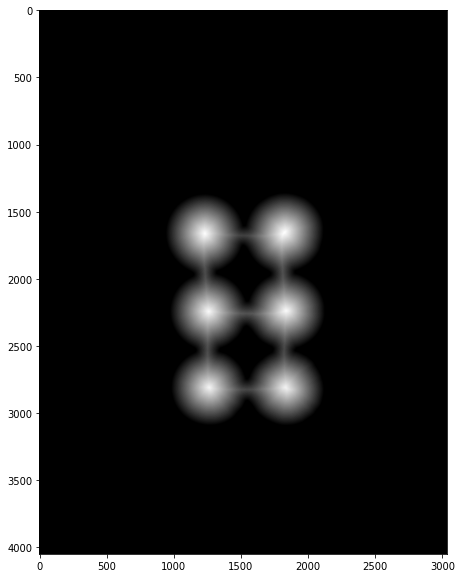

In [70]:
dis_transform = cv2.distanceTransform(openning, cv2.DIST_L2, 5)
display_img(dis_transform, 'gray')

### Foreground

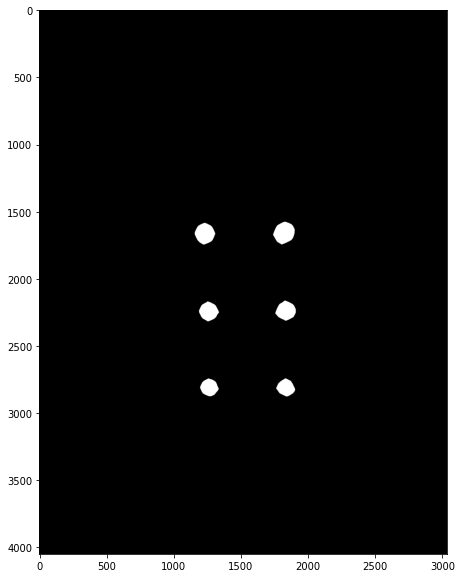

In [72]:
ret, sure_fg = cv2.threshold(dis_transform, 0.75*dis_transform.max(), 255, 0)
display_img(sure_fg, 'gray')

In [74]:
sure_fg = np.uint8(sure_fg)

### Unknow Region

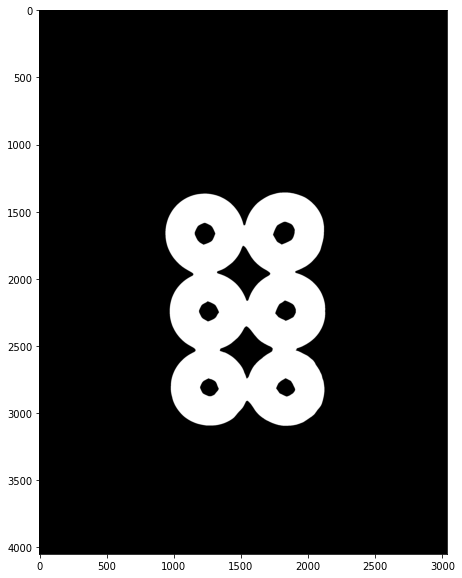

In [76]:
unk_region = cv2.subtract(sure_bg, sure_fg)
display_img(unk_region, 'gray')

### Marker

In [77]:
# tim connected components cua fg
ret, markers = cv2.connectedComponents(sure_fg)

In [81]:
# những vùng “unknown zones” sẽ được đánh dấu là 0, các phần foreground/background được đánh dấu bởi các số dương
markers = markers + 1
markers[unk_region == 255] = 0

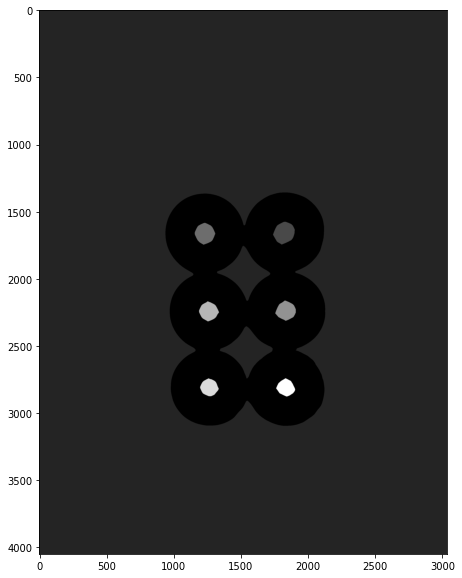

In [82]:
display_img(markers, 'gray')

### Wartershed

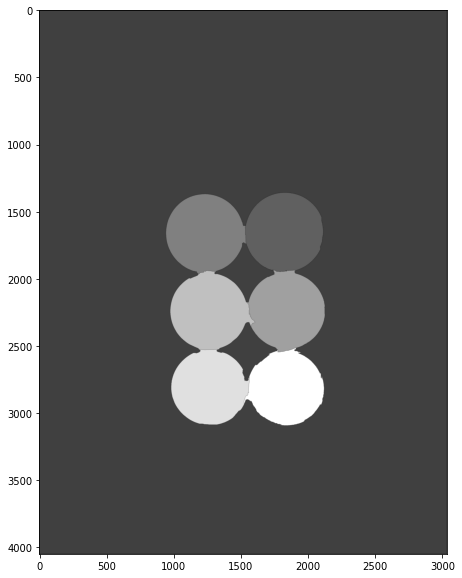

In [84]:
markers = cv2.watershed(blurred, markers)
display_img(markers, 'gray')

### Find contours

In [85]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [89]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [-1,  8, -1, -1]]], dtype=int32)

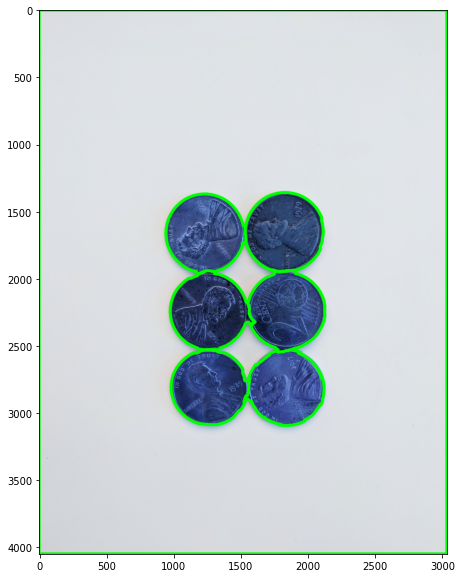

In [87]:
count = 0
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (0,255,0), 20)
        count += 1

display_img(img)

In [88]:
count

10